In [1]:
# box 1 for in-class
# explain each import and from statement...what does it do and why do you need it
import torch    # main PyTorch library needed for tensor operations
import torch.nn as nn   # neural network module from PyTorch needed for building models
import torchvision  # computer vision library built on top of PyTorch needed for datasets and models
from torchvision import transforms  # image transformation utilities needed for preprocessing images
import numpy as np  # numerical operations library needed for array manipulations
from torch.utils.data import Dataset, random_split
from IPython.display import Image   # display images in Jupyter notebooks needed for visualizing images
from PIL import Image
import matplotlib.pyplot as plt # plotting library needed for visualizations
import os

Total images: 70
Train: 56 Valid: 14


(-0.5, 499.5, 499.5, -0.5)

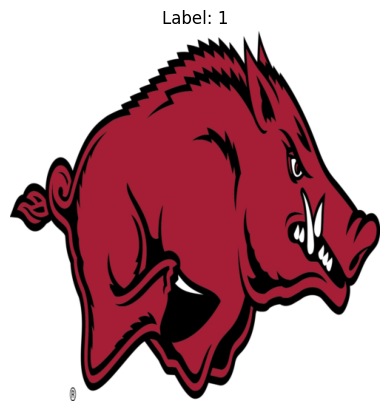

In [2]:

# box 2: load a custom image dataset from `data/images`
# Filenames must include `_1` or `_0` to indicate label 1 or 0 respectively.
        
# Adjust this path if your notebook root is different. From this notebook, use '../data/images'
image_dir = '../data/images'
        
class CustomImageDataset(Dataset):
	def __init__(self, img_dir, transform=None):
		self.img_dir = img_dir
		self.transform = transform
		# collect image file paths (jpg, jpeg, png, webp)
		self.images = [f for f in os.listdir(img_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.webp'))]
		if len(self.images) == 0:
			raise RuntimeError(f'No images found in {img_dir}')
		self.images.sort()  # deterministic order
        
	def __len__(self):
		return len(self.images)
        
	def __getitem__(self, idx):
		fname = self.images[idx]
		path = os.path.join(self.img_dir, fname)
		img = Image.open(path).convert('RGB')
		if self.transform is not None:
			img = self.transform(img)
		# parse label from filename: contains _1 -> label 1, _0 -> label 0
		if '_1' in fname:
			label = 1
		elif '_0' in fname:
			label = 0
		else:
			# fallback: set to 0 (change this logic if needed)
			label = 0
		return img, torch.tensor(label, dtype=torch.long)
        
# Define transforms (modify size/normalization to match your model)
transform = transforms.Compose([
	# final required size for assignment
	transforms.Resize((500, 500)),
	transforms.ToTensor(),
])

# Create dataset and split into train/valid (80/20)
dataset = CustomImageDataset(image_dir, transform=transform)
n = len(dataset)
train_len = int(0.8 * n)
valid_len = n - train_len
train_ds, valid_ds = random_split(dataset, [train_len, valid_len])

print('Total images:', n)
print('Train:', len(train_ds), 'Valid:', len(valid_ds))
        
# Show a quick sample (works in Jupyter/Colab)
sample_img, sample_label = dataset[0]
plt.imshow(sample_img.permute(1,2,0))
plt.title(f'Label: {int(sample_label)}')
plt.axis('off')

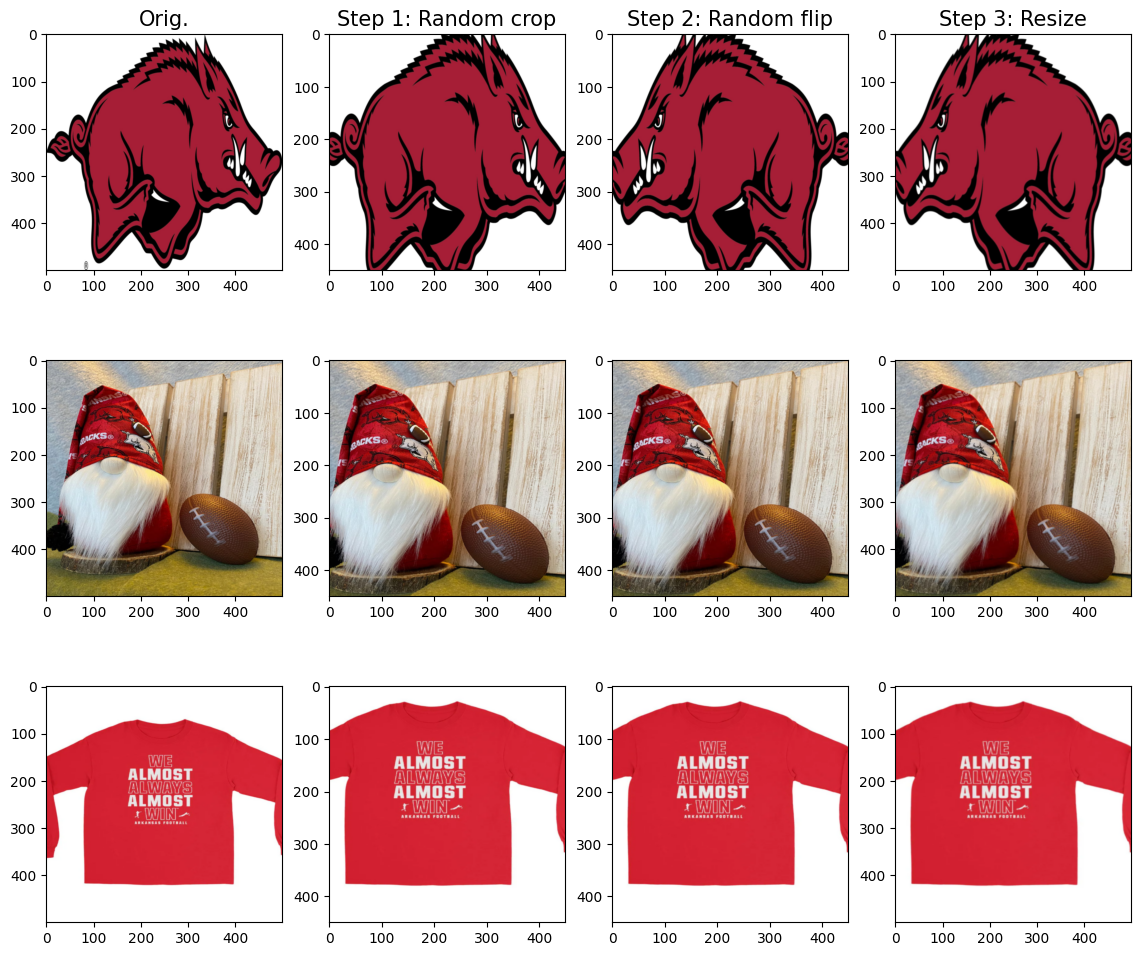

In [3]:
# this box visualizes the effects of a series of image transformations

torch.manual_seed(1)

fig = plt.figure(figsize=(14, 12))

for i, (img, attr) in enumerate(dataset):

    # this group visualizes the original image
    #ax = fig.add_subplot(3, 4, i*4+1)
    #ax.imshow(img)
    #if i == 0:
    #    ax.set_title('Orig.', size=15)

    ax = fig.add_subplot(3, 4, i*4+1)
    # convert tensor (C,H,W) to HWC numpy for matplotlib, or handle PIL images
    if torch.is_tensor(img):    # edit start here
        disp = img.permute(1, 2, 0).cpu().numpy() 
    else:
        disp = np.array(img)
    ax.imshow(disp)  # edit end here
    
    if i == 0:
        ax.set_title('Orig.', size=15)

    ax = fig.add_subplot(3, 4, i*4+2)

    # this line defines a transformation that randomly crops the image to 178x178 pixels
    img_transform = transforms.Compose([transforms.RandomCrop([450, 450])])

    # this line applies the random crop transformation to the original image
    img_cropped = img_transform(img)

    # this line displays the cropped image
    #ax.imshow(img_cropped)
    #if i == 0:
    #    ax.set_title('Step 1: Random crop', size=15)

    if torch.is_tensor(img_cropped):    # edit start here
        disp = img_cropped.permute(1, 2, 0).cpu().numpy()
    else:
        disp = np.array(img_cropped)
    ax.imshow(disp)  # edit end here

    if i == 0:
        ax.set_title('Step 1: Random crop', size=15)

    # what does this group do
    # this group applies a random horizontal flip to the cropped image and displays it
    ax = fig.add_subplot(3, 4, i*4+3)
    img_transform = transforms.Compose([transforms.RandomHorizontalFlip()])
    img_flip = img_transform(img_cropped)
    #ax.imshow(img_flip)
    #if i == 0:
    #    ax.set_title('Step 2: Random flip', size=15)

    if torch.is_tensor(img_flip):   # edit start here
        disp = img_flip.permute(1, 2, 0).cpu().numpy()
    else:
        disp = np.array(img_flip)
    ax.imshow(disp) # edit end here
    
    if i == 0:
        ax.set_title('Step 2: Random flip', size=15)

    # what does this group do
    # this group resizes the flipped image to 128x128 pixels and displays it
    ax = fig.add_subplot(3, 4, i*4+4)
    img_resized = transforms.functional.resize(img_flip, size=(500, 500))
    #ax.imshow(img_resized)
    #if i == 0:
    #    ax.set_title('Step 3: Resize', size=15)

    if torch.is_tensor(img_resized):    # edit start here
        disp = img_resized.permute(1, 2, 0).cpu().numpy()
    else:
        disp = np.array(img_resized)
    ax.imshow(disp) # edit end here

    if i == 0:
        ax.set_title('Step 3: Resize', size=15)

    # why include this
    # this condition limits the visualization to the first three images for brevity
    if i == 2:
        break

plt.show()

In [4]:
# box 4
# overall, this box defines image transformations for training and evaluation
# what does this do
# this lambda function extracts the 'Razorback' attribute from the attribute list
get_razorback = lambda attr: attr[31]

# what does this do
# this transformation pipeline applies random cropping, horizontal flipping, resizing, and conversion to tensor for training images
#transform_train = transforms.Compose([
 #   transforms.Resize((600, 600)),
  #  transforms.RandomCrop([550, 550]),
   ##transforms.Resize((500, 500)),
    #transforms.ToTensor(),
#])

#transform_train = transforms.Compose([
 #   transforms.Resize((500, 500)),
  #  transforms.RandomHorizontalFlip(),
   # transforms.RandomRotation(15),
    #transforms.ColorJitter(brightness=0.2, contrast=0.2),
    #transforms.RandomResizedCrop(500, scale=(0.8, 1.0)),
    #transforms.ToTensor(),
#])

transform_train = transforms.Compose([
    transforms.RandomResizedCrop(500, scale=(0.6, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
])


# what does this do
# this transformation pipeline applies center cropping, resizing, and conversion to tensor for evaluation images
transform = transforms.Compose([
    #transforms.Resize((600, 600)),
    #transforms.CenterCrop([550, 550]),
    transforms.Resize((500, 500)),
    transforms.ToTensor(),
])


In [5]:
from torch.utils.data import DataLoader, Subset

# Build full datasets with the train / eval transforms
dataset = CustomImageDataset(image_dir, transform=transform_train)    # just for visualization purposes
full_train_dataset = CustomImageDataset(image_dir, transform=transform_train)
full_valid_dataset = CustomImageDataset(image_dir, transform=transform)

# If you previously created train_ds / valid_ds as Subset(dataset, indices), reuse their indices
if isinstance(train_ds, Subset):
    train_dataset = Subset(full_train_dataset, train_ds.indices)
    valid_dataset = Subset(full_valid_dataset, valid_ds.indices)
else:
    # fallback: just use full datasets (no split)
    train_dataset = full_train_dataset
    valid_dataset = full_valid_dataset

# Create DataLoaders (adjust batch_size and num_workers to suit your environment)
# In Jupyter notebooks or on some platforms, multiple worker processes can crash.
# Use num_workers=0 and pin_memory=False to avoid DataLoader worker crashes.
batch_size = 4
data_loader = DataLoader(dataset, batch_size=batch_size)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

print('Train samples:', len(train_dataset), '-> batches:', len(train_loader))
print('Valid samples:', len(valid_dataset), '-> batches:', len(valid_loader))

Train samples: 56 -> batches: 14
Valid samples: 14 -> batches: 4


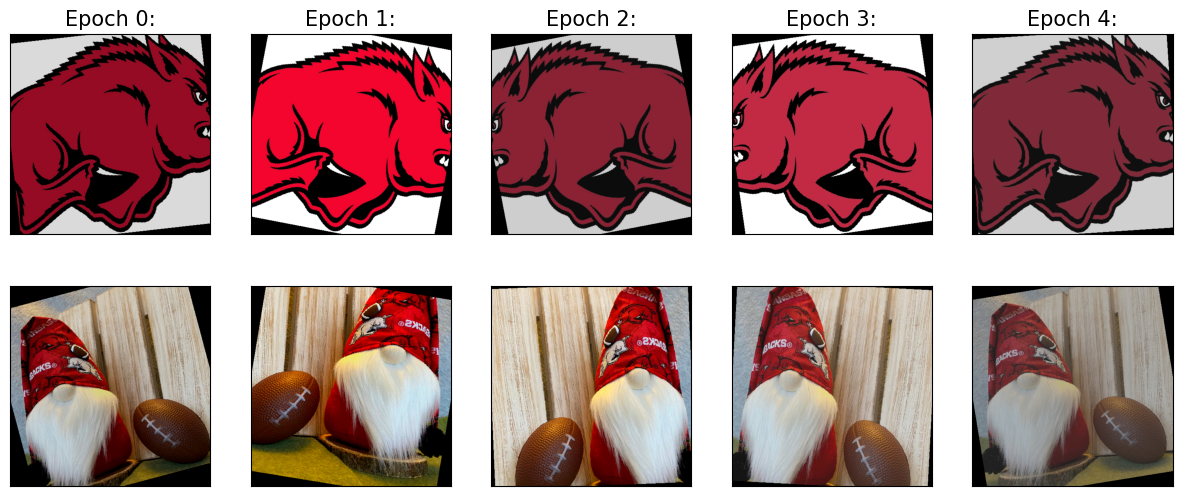

In [6]:
# box 6   explain overall
# overall, this box visualizes a few batches of images from the DataLoader over multiple epochs
fig = plt.figure(figsize=(15, 6))

num_epochs = 5
for j in range(num_epochs):
    img_batch, label_batch = next(iter(data_loader))
    img = img_batch[0]
    ax = fig.add_subplot(2, 5, j + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Epoch {j}:', size=15)
    ax.imshow(img.permute(1, 2, 0))

    img = img_batch[1]
    ax = fig.add_subplot(2, 5, j + 6)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img.permute(1, 2, 0))


#plt.savefig('figures/14_16.png', dpi=300)
plt.show()

In [7]:
model = nn.Sequential()

# Convolution blocks
model.add_module('conv1', nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, padding=1))
model.add_module('relu1', nn.ReLU())
model.add_module('pool1', nn.MaxPool2d(kernel_size=2))
model.add_module('dropout1', nn.Dropout(p=0.2))

model.add_module('conv2', nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1))
model.add_module('relu2', nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(kernel_size=2))
model.add_module('dropout2', nn.Dropout(p=0.2))

model.add_module('conv3', nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1))
model.add_module('relu3', nn.ReLU())
model.add_module('pool3', nn.MaxPool2d(kernel_size=2))

#model.add_module('conv4', nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1))
#model.add_module('relu4', nn.ReLU())

# ADD THESE BEFORE TESTING ANYTHING
#model.add_module('pool4', nn.AvgPool2d(kernel_size=8))
model.add_module('flatten', nn.Flatten())

# Now the FC layer matches size
model.add_module('fc', nn.Linear(32*62*62, 1))
#model.add_module('sigmoid', nn.Sigmoid())


In [8]:
x = torch.ones((1, 3, 500, 500))
print(model(x).shape)


torch.Size([1, 1])


In [9]:
# this line prints the architecture of the defined CNN
model

Sequential(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.2, inplace=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.2, inplace=False)
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=123008, out_features=1, bias=True)
)

In [10]:
# this box sets up the device for computation and moves the model to that device

# this line sets the computation device to GPU if available, otherwise CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# this line moves the model to the specified computation device
model = model.to(device)
# this box defines the loss function and optimizer for training the CNN model

# this line defines the binary cross-entropy loss function for training
#loss_fn = nn.BCELoss()
loss_fn = nn.BCEWithLogitsLoss()


# this line defines the Adam optimizer for training the model with a learning rate of 0.001
#optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)


In [11]:
# this box defines the training function for the CNN model, which includes training and validation loops, loss calculation, and accuracy tracking
def train(model, num_epochs, train_dl, valid_dl):

    # this group initializes lists to store training and validation loss and accuracy for each epoch
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs

    # this loop iterates over the specified number of epochs for training
    for epoch in range(num_epochs):

        # this line sets the model to training mode
        model.train()

        # this loop iterates over batches of data from the training DataLoader
        for x_batch, y_batch in train_dl:
            # this line moves the input batch to the computation device
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)

            # this line computes the model's predictions for the input batch
            pred = model(x_batch)[:, 0]

            # this line computes the loss between the predictions and true labels
            loss = loss_fn(pred, y_batch.float())

            # what does this do
            # this line performs backpropagation to compute gradients
            loss.backward()

            # this line updates the model parameters based on computed gradients
            optimizer.step()

            # this line resets the gradients of the optimizer to zero for the next iteration
            optimizer.zero_grad()

            # this group accumulates the training loss and accuracy for the current epoch
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum().cpu()

        # this group computes the average training loss and accuracy for the current epoch
        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)

        # this line sets the model to evaluation mode
        model.eval()


        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                x_batch = x_batch.to(device)
                y_batch = y_batch.to(device)

                logits = model(x_batch)[:, 0]
                # loss = loss_fn(pred, y_batch.float())
                loss = loss_fn(logits, y_batch.float())


                loss_hist_valid[epoch] += loss.item() * y_batch.size(0)

                # pred = model(x_batch)[:, 0]
                pred = (torch.sigmoid(logits) >= 0.5).float()
                # is_correct = ((pred>=0.5).float() == y_batch).float()
                accuracy_hist_valid[epoch] += (pred == y_batch).float().sum().cpu()
        

        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)

        print(f'Epoch {epoch+1} accuracy: {accuracy_hist_train[epoch]:.4f} val_accuracy: {accuracy_hist_valid[epoch]:.4f}')
        #print(f"Epoch {epoch+1} | Train Loss: {loss_hist_train[epoch]:.4f} | Val Loss: {loss_hist_valid[epoch]:.4f}")


    # this function returns four lists: loss_hist_train and accuracy_hist_train contain the training loss and accuracy for each epoch, while loss_hist_valid and accuracy_hist_valid contain the validation loss and accuracy for each epoch
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid


In [20]:
# this box sets the random seed, defines the number of epochs, and calls the training function to train the model
torch.manual_seed(1)

# original example had 30 but it took ~1 hour to run 15 epochs
num_epochs = 20

# what does this do
hist = train(model, num_epochs, train_loader, valid_loader)

Epoch 1 accuracy: 0.5357 val_accuracy: 0.5714
Epoch 2 accuracy: 0.6071 val_accuracy: 0.4286
Epoch 3 accuracy: 0.6786 val_accuracy: 0.5000
Epoch 4 accuracy: 0.6071 val_accuracy: 0.5714
Epoch 5 accuracy: 0.6071 val_accuracy: 0.5000
Epoch 6 accuracy: 0.6964 val_accuracy: 0.5000
Epoch 7 accuracy: 0.6786 val_accuracy: 0.5714
Epoch 8 accuracy: 0.6607 val_accuracy: 0.5714
Epoch 9 accuracy: 0.7321 val_accuracy: 0.5714
Epoch 10 accuracy: 0.5357 val_accuracy: 0.6429
Epoch 11 accuracy: 0.6607 val_accuracy: 0.6429
Epoch 12 accuracy: 0.5179 val_accuracy: 0.5000
Epoch 13 accuracy: 0.5000 val_accuracy: 0.5000
Epoch 14 accuracy: 0.5714 val_accuracy: 0.5714
Epoch 15 accuracy: 0.7143 val_accuracy: 0.7143
Epoch 16 accuracy: 0.6964 val_accuracy: 0.6429
Epoch 17 accuracy: 0.6786 val_accuracy: 0.6429
Epoch 18 accuracy: 0.5536 val_accuracy: 0.5714
Epoch 19 accuracy: 0.5714 val_accuracy: 0.4286
Epoch 20 accuracy: 0.5714 val_accuracy: 0.5714


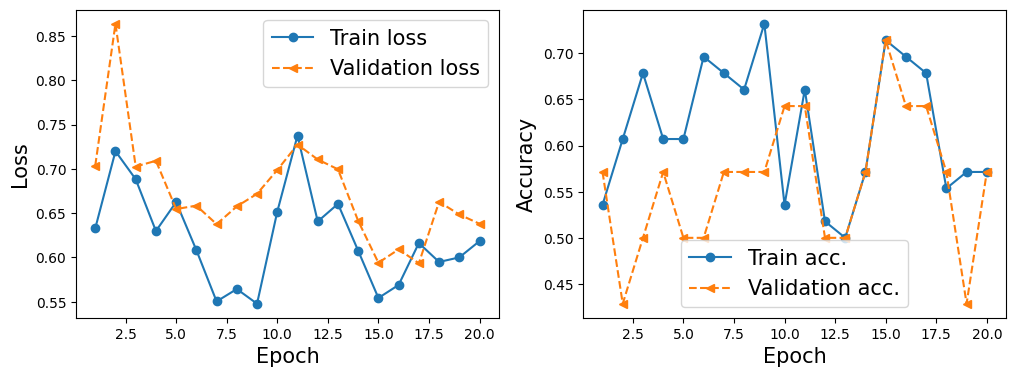

In [21]:
# box 20 describe overall...include if you are happy with results and what you could do to improve if it needed it
# overall, this box visualizes the training and validation loss and accuracy over epochs using line plots
x_arr = np.arange(len(hist[0])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train acc.')
ax.plot(x_arr, hist[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/14_17.png', dpi=300)
plt.show()

In [22]:
# box 21
# this box visualizes the training and validation loss and accuracy over epochs using line plots
accuracy_test = 0

# what does this do
# this line sets the model to evaluation mode
model.eval()

# what does this do
# this loop iterates over batches of data from the test DataLoader without computing gradients
with torch.no_grad():
    for x_batch, y_batch in valid_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        #pred = model(x_batch)[:, 0]
        logits = model(x_batch)[:, 0]
        pred = (torch.sigmoid(logits) >= 0.5).float()
        
        is_correct = ((pred>=0.5).float() == y_batch).float()
        accuracy_test += is_correct.sum().cpu()


accuracy_test /= len(valid_loader.dataset)

print(f'Test accuracy: {accuracy_test:.4f}')

Test accuracy: 0.5714


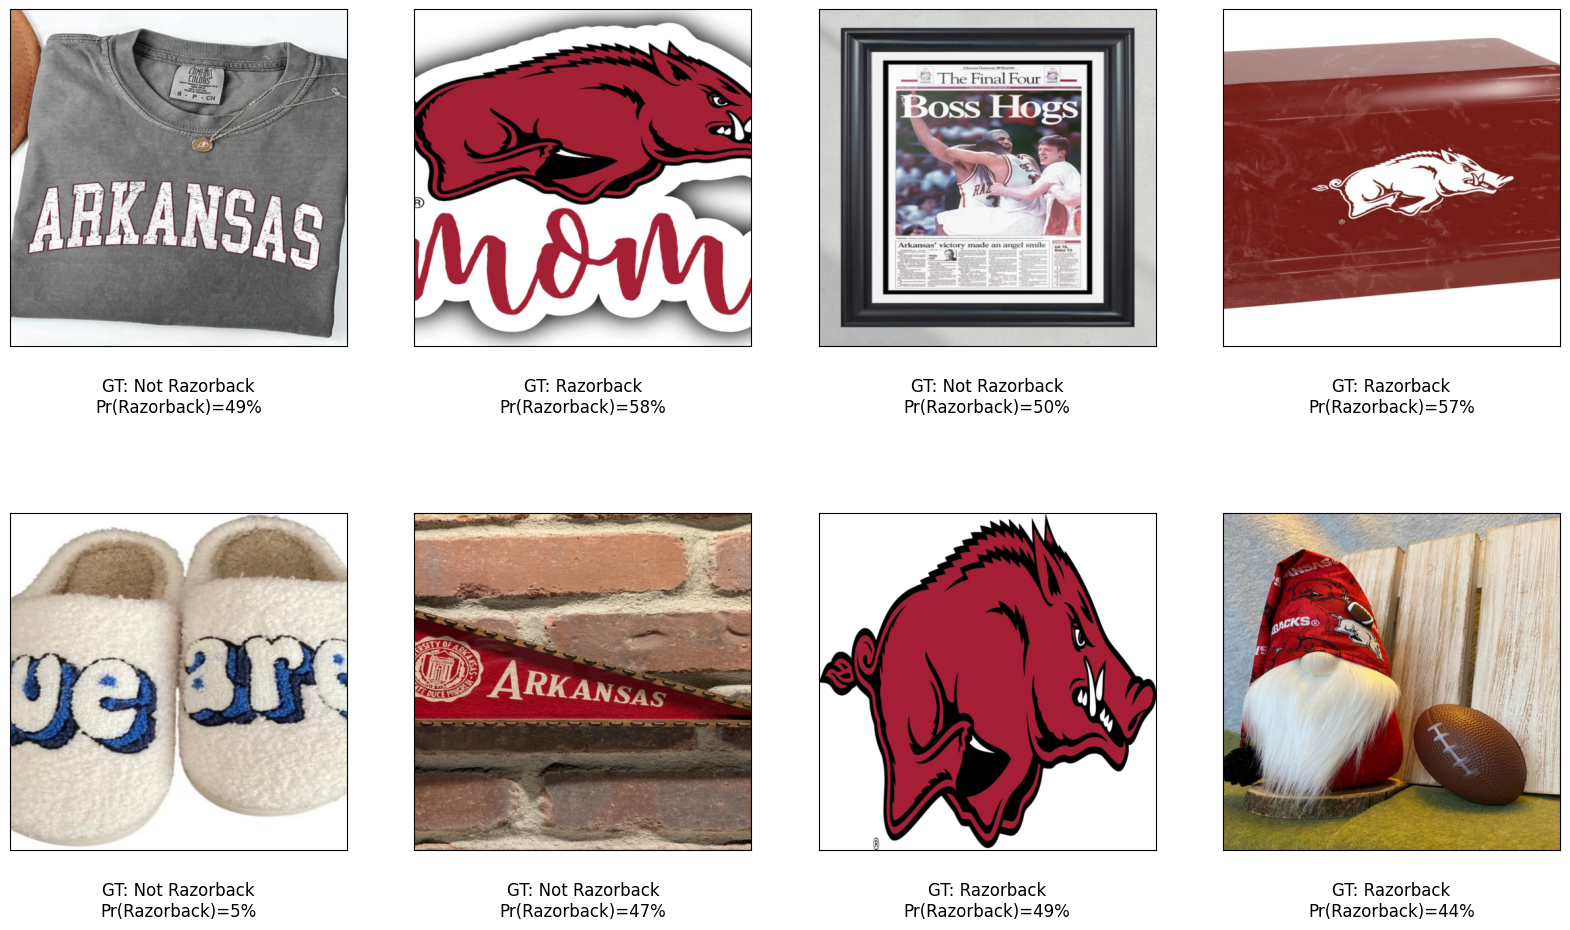

In [23]:
pred_batches = []
x_batches = []
y_batches = []

# Number of batches you want to visualize
num_batches_to_show = 2

for i, (x_batch, y_batch) in enumerate(valid_loader):
    x_batches.append(x_batch)
    y_batches.append(y_batch)
    if i+1 >= num_batches_to_show:
        break

# Flatten all batches into a single list of images/labels
x_all = torch.cat(x_batches, dim=0)
y_all = torch.cat(y_batches, dim=0)

# Compute probabilities
pred_all = torch.sigmoid(model(x_all.to(device))[:, 0]) * 100

# Plot
fig = plt.figure(figsize=(20, 12))
n = x_all.size(0)

for j in range(n):
    ax = fig.add_subplot(2, (n+1)//2, j+1)  # 2 rows if lots of images
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(x_all[j].cpu().permute(1, 2, 0))

    label = 'Razorback' if y_all[j] == 1 else 'Not Razorback'
    ax.text(
        0.5, -0.15,
        f'GT: {label}\nPr(Razorback)={pred_all[j]:.0f}%',
        size=12,
        ha='center',
        va='center',
        transform=ax.transAxes
    )

plt.show()
